# Linear Regression 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#

Sample regression line:

\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i
\end{equation}

## Diabetes dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [3]:
print(diabetes_X.shape)
print(diabetes_y.shape)

(442, 1)
(442,)


In [4]:
type(diabetes_X)

numpy.ndarray

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [6]:
print(diabetes_X_train.shape)
print(diabetes_X_test.shape)

(422, 1)
(20, 1)


In [7]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [8]:
print(diabetes_y_train.shape)
print(diabetes_y_test.shape)

(422,)
(20,)


In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [10]:

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [11]:

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


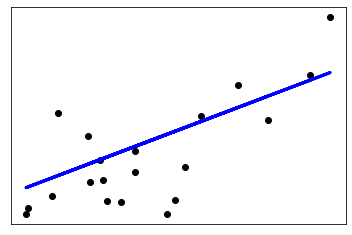

In [12]:

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## EPA Dataset 

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
pd.plotting.

In [14]:
#Read the data in from somewhere
epa = pd.read_csv('https://raw.githubusercontent.com/sqlshep/SQLShepBlog/master/data/epaMpg.csv')



In [15]:
epa.head(10)

,RowNumber,Represented.Test.Veh.Make,Model,Vehicle.Type,HorsePower,Cylinders,Tested.Transmission.Type.Code,Tested.Transmission.Type,Gears,Drive.System.Code,Weight,AxleRatio,Test.Procedure.Cd,Test.Procedure.Description,Test.Fuel.Type.Cd,Test.Fuel.Type.Description,FuelEcon
0,1,Aston Martin,Rapide S,Car,552,12,SA,Semi-Automatic,8,R,4750,2.73,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,17.3
1,2,Aston Martin,Vanquish,Car,568,12,SA,Semi-Automatic,8,R,4500,2.73,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,16.5
2,3,BENTLEY,Continental GT,Car,616,12,SA,Semi-Automatic,8,F,6000,2.85,90,US06,61,Tier 2 Cert Gasoline,17.4
3,4,BENTLEY,Continental GT,Car,616,12,SA,Semi-Automatic,8,F,6000,2.85,11,Cold CO,27,Cold CO Premium (Tier 2),13.6
4,5,BMW,230i Convertible,Car,248,4,SA,Semi-Automatic,8,R,4000,2.81,3,HWFE,61,Tier 2 Cert Gasoline,45.8
5,6,BMW,230i Coupe,Car,248,4,M,Manual,6,R,3625,3.91,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,26.4
6,7,BMW,230i Coupe,Car,248,4,SA,Semi-Automatic,8,R,3625,2.81,3,HWFE,61,Tier 2 Cert Gasoline,50.6
7,8,BMW,230i xDrive Convertible,Car,248,4,SA,Semi-Automatic,8,R,4000,2.81,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,29.6
8,9,BMW,230i xDrive Coupe,Car,248,4,SA,Semi-Automatic,8,R,3750,2.81,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,30.3
9,10,BMW,320i,Both,181,4,A,Automatic,8,R,3625,3.20,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,30.4


In [16]:
epa.shape

(1034, 17)

In [17]:
epa.describe()

,RowNumber,HorsePower,Cylinders,Gears,Weight,AxleRatio,Test.Procedure.Cd,Test.Fuel.Type.Cd,FuelEcon
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,521.361702,291.824952,5.431335,6.509671,4191.852031,3.411064,24.993230,56.366538,28.216538
std,300.241933,144.294932,1.905214,1.992824,787.821434,0.586484,22.078601,11.633650,9.496233
min,1.000000,72.000000,3.000000,1.000000,2375.000000,1.560000,2.000000,19.000000,9.200000
25%,262.250000,181.000000,4.000000,6.000000,3625.000000,3.070000,11.000000,61.000000,21.525000
50%,520.500000,271.500000,4.000000,7.000000,4000.000000,3.360000,21.000000,61.000000,26.800000
75%,781.750000,355.000000,6.000000,8.000000,4750.000000,3.700000,31.000000,61.000000,33.400000
max,1040.000000,1500.000000,16.000000,10.000000,6500.000000,5.440000,95.000000,61.000000,71.600000


In [18]:
#Drop the row number
epa = epa.drop(epa.columns[[0]], axis=1)

#replace the "." in the column names with "_"
epa.columns = epa.columns.str.replace('.', '_')

In [19]:
# Drop the first three columns
epa = epa.drop(epa.columns[[0,1,2]], axis=1)
epa

,HorsePower,Cylinders,Tested_Transmission_Type_Code,Tested_Transmission_Type,Gears,Drive_System_Code,Weight,AxleRatio,Test_Procedure_Cd,Test_Procedure_Description,Test_Fuel_Type_Cd,Test_Fuel_Type_Description,FuelEcon
0,552,12,SA,Semi-Automatic,8,R,4750,2.73,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,17.3
1,568,12,SA,Semi-Automatic,8,R,4500,2.73,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,16.5
2,616,12,SA,Semi-Automatic,8,F,6000,2.85,90,US06,61,Tier 2 Cert Gasoline,17.4
3,616,12,SA,Semi-Automatic,8,F,6000,2.85,11,Cold CO,27,Cold CO Premium (Tier 2),13.6
4,248,4,SA,Semi-Automatic,8,R,4000,2.81,3,HWFE,61,Tier 2 Cert Gasoline,45.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,313,4,SA,Semi-Automatic,8,A,5000,3.33,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,33.1
1030,250,4,SA,Semi-Automatic,8,F,5000,3.33,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,27.4
1031,250,4,SA,Semi-Automatic,8,F,4750,3.33,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,28.6
1032,316,4,SA,Semi-Automatic,8,F,5000,3.33,3,HWFE,61,Tier 2 Cert Gasoline,37.9


In [20]:
# drop descrition columns
epa = epa.drop(epa.columns[[3,9,11]], axis=1)
epa

,HorsePower,Cylinders,Tested_Transmission_Type_Code,Gears,Drive_System_Code,Weight,AxleRatio,Test_Procedure_Cd,Test_Fuel_Type_Cd,FuelEcon
0,552,12,SA,8,R,4750,2.73,21,61,17.3
1,568,12,SA,8,R,4500,2.73,21,61,16.5
2,616,12,SA,8,F,6000,2.85,90,61,17.4
3,616,12,SA,8,F,6000,2.85,11,27,13.6
4,248,4,SA,8,R,4000,2.81,3,61,45.8
...,...,...,...,...,...,...,...,...,...,...
1029,313,4,SA,8,A,5000,3.33,21,61,33.1
1030,250,4,SA,8,F,5000,3.33,31,61,27.4
1031,250,4,SA,8,F,4750,3.33,31,61,28.6
1032,316,4,SA,8,F,5000,3.33,3,61,37.9


### Visualizations 

<AxesSubplot: xlabel='HorsePower', ylabel='Cylinders'>

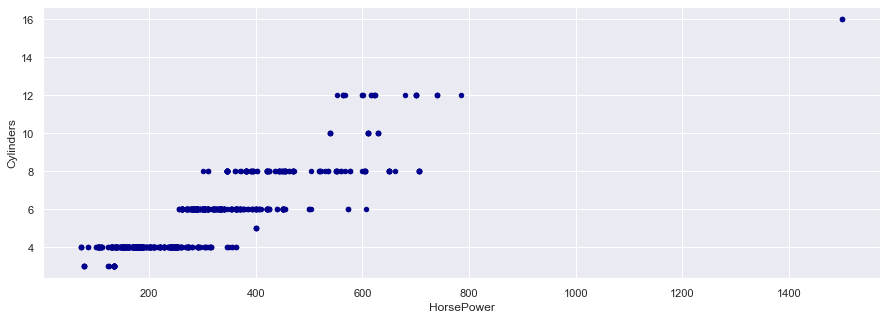

In [32]:
epa.plot.scatter(x='HorsePower',
                      y='Cylinders',
                      c='DarkBlue',
                figsize=(15,5))

<AxesSubplot: xlabel='HorsePower', ylabel='Weight'>

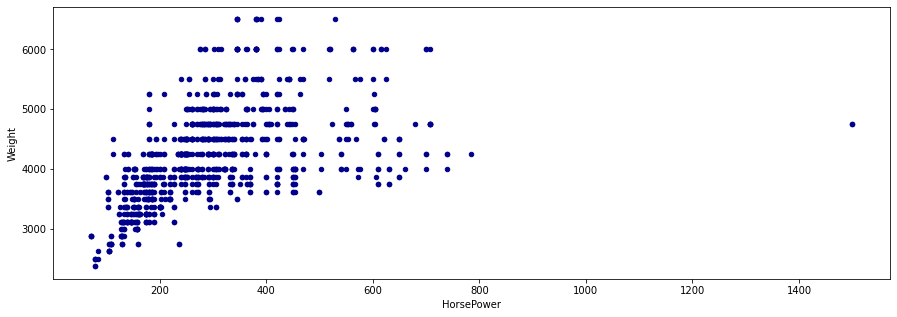

In [22]:
epa.plot.scatter(x='HorsePower',
                      y='Weight',
                      c='DarkBlue',
                figsize=(15,5))

<AxesSubplot: xlabel='HorsePower', ylabel='FuelEcon'>

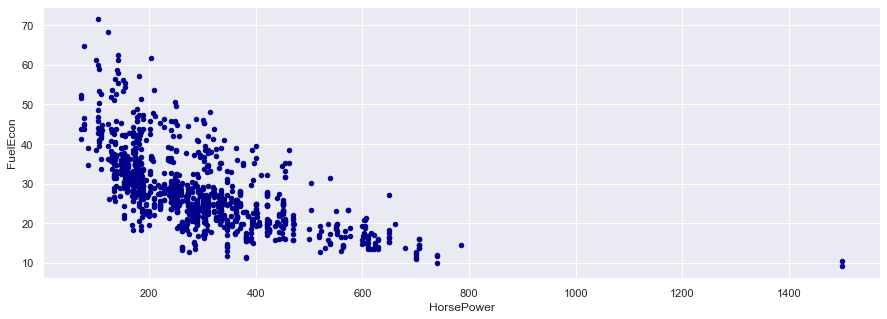

In [31]:
epa.plot.scatter(x='HorsePower',
                      y='FuelEcon',
                      c='DarkBlue',
                figsize=(15,5))

<AxesSubplot: >

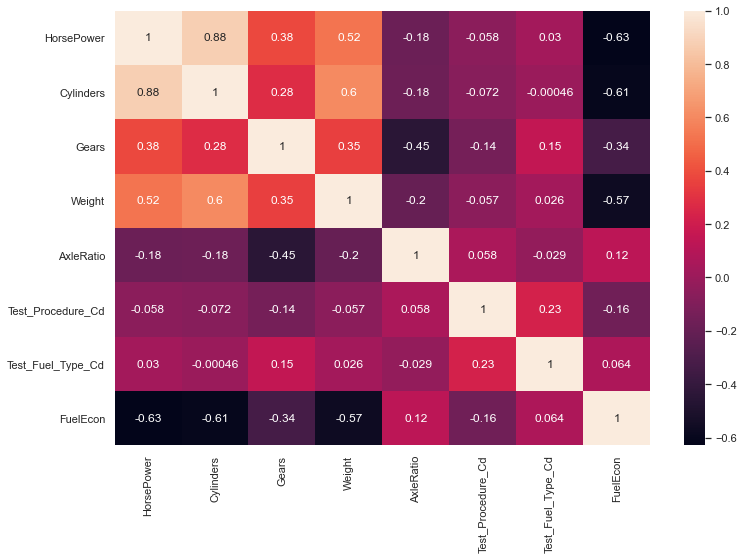

In [29]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(epa.corr(), annot = True)


In [33]:
# Types of object are character string
epa.dtypes

HorsePower                         int64
Cylinders                          int64
Tested_Transmission_Type_Code     object
Gears                              int64
Drive_System_Code                 object
Weight                             int64
AxleRatio                        float64
Test_Procedure_Cd                  int64
Test_Fuel_Type_Cd                  int64
FuelEcon                         float64
dtype: object

In [34]:
epa['Tested_Transmission_Type_Code']= epa['Tested_Transmission_Type_Code'].astype('category')
    
epa['Drive_System_Code']= epa['Drive_System_Code'].astype('category')

In [35]:
#One hot encode categories
epa = pd.get_dummies(epa)

In [36]:
print(epa.shape)
epa

(1034, 20)


,HorsePower,Cylinders,Gears,Weight,AxleRatio,Test_Procedure_Cd,Test_Fuel_Type_Cd,FuelEcon,Tested_Transmission_Type_Code_A,Tested_Transmission_Type_Code_AM,Tested_Transmission_Type_Code_AMS,Tested_Transmission_Type_Code_CVT,Tested_Transmission_Type_Code_M,Tested_Transmission_Type_Code_SA,Tested_Transmission_Type_Code_SCV,Drive_System_Code_4,Drive_System_Code_A,Drive_System_Code_F,Drive_System_Code_P,Drive_System_Code_R
0,552,12,8,4750,2.73,21,61,17.3,0,0,0,0,0,1,0,0,0,0,0,1
1,568,12,8,4500,2.73,21,61,16.5,0,0,0,0,0,1,0,0,0,0,0,1
2,616,12,8,6000,2.85,90,61,17.4,0,0,0,0,0,1,0,0,0,1,0,0
3,616,12,8,6000,2.85,11,27,13.6,0,0,0,0,0,1,0,0,0,1,0,0
4,248,4,8,4000,2.81,3,61,45.8,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,313,4,8,5000,3.33,21,61,33.1,0,0,0,0,0,1,0,0,1,0,0,0
1030,250,4,8,5000,3.33,31,61,27.4,0,0,0,0,0,1,0,0,0,1,0,0
1031,250,4,8,4750,3.33,31,61,28.6,0,0,0,0,0,1,0,0,0,1,0,0
1032,316,4,8,5000,3.33,3,61,37.9,0,0,0,0,0,1,0,0,0,1,0,0


In [52]:
# Create the training dataset for scikit learn, you will need all 
# varialbes except the label you are trying to predict
epa_X = epa.iloc[:, epa.columns !='FuelEcon']


In [56]:
# You will also need a dataset the the target varialbe

epa_y = epa.iloc[:, epa.columns =='FuelEcon']

In [57]:
# Split the training and test set 
X_train, X_test, y_train, y_test = train_test_split(epa_X, epa_y, test_size=0.20)

In [58]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(827, 19) (207, 19) (827, 1) (207, 1)


In [59]:
from sklearn import linear_model

In [61]:
epa_lm = linear_model.LinearRegression()

In [62]:
epa_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
import math 
model_metrics = pd.DataFrame(columns=["Model", "MSE", "RMSE", "R2"])


def metrics(model, y, y_hat):

    model_metrics.loc[-1] = {"Model" : model, 
              "MSE" : mean_squared_error(y, y_hat),
              "RMSE" : math.sqrt(mean_squared_error(y, y_hat)),
              "R2" : r2_score(y, y_hat)}

    model_metrics.index = model_metrics.index + 1
    return model_metrics 

#metrics("PCA Forest",y_test, epa_pca_y_pred)

In [63]:
epa_y_pred = epa_lm.predict(X_test)

In [76]:
metrics("linear_model",y_test, epa_y_pred)

,Model,MSE,RMSE,R2
0,linear_model,34.504881,5.874086,0.612347


In [77]:
print(epa_lm.coef_)
print(epa_lm.rank_)
print(epa_lm.intercept_ )

[[-2.20984214e-02 -3.72771841e-01  8.21567890e-01 -3.68683118e-03
  -9.80512350e-01 -1.27881915e-01  1.42626309e-01 -3.16800538e+00
   9.58566459e-01 -3.68351666e+00  1.18910579e+01 -2.76771212e+00
  -2.18523039e+00 -1.04515979e+00  4.17989556e-01  1.21171358e+00
   1.97368389e+00 -3.99525471e+00  3.91867693e-01]]
17
[45.50273487]


In [78]:
#make a prediction

epa_lm.predict(X_test[64:65].to_numpy().tolist())


array([[25.11312148]])

### Visualize the Error

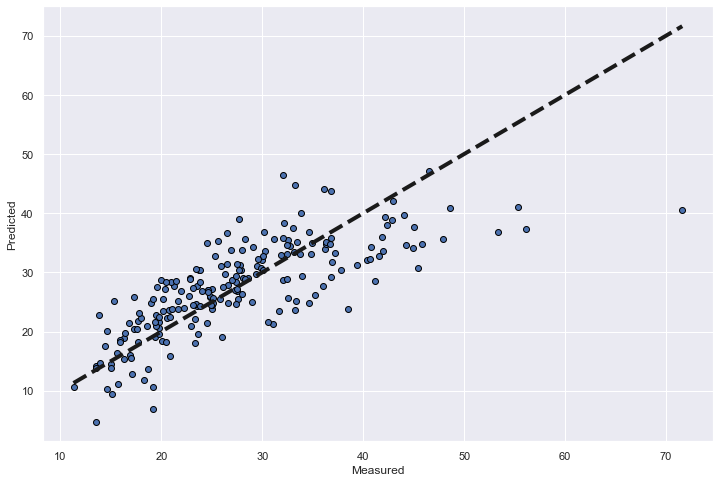

In [79]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(epa_lm, X_test, y_test, cv=5)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
